In [19]:
#!pip install google-api-python-client

In [20]:
import pandas as pd
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

In [21]:
cred=pd.read_csv('ytb_key.csv')

In [22]:
cred=cred['API_KEY'].values[0]

In [23]:
API_KEY=cred

In [24]:
def get_trending_videos(api_key, max_results=200):
    try:
        # Build the YouTube service
        youtube = build('youtube', 'v3', developerKey=api_key)

        # Initialize the list to hold video details
        videos = []

        # Fetch the most popular videos
        request = youtube.videos().list(
            part='snippet,contentDetails,statistics',
            chart='mostPopular',
            regionCode='IN',  
            maxResults=50
        )

        # Paginate through the results if max_results > 50
        while request and len(videos) < max_results:
            response = request.execute()
            for item in response['items']:
                video_details = {
                    'video_id': item['id'],
                    'title': item['snippet']['title'],
                    'description': item['snippet']['description'],
                    'published_at': item['snippet']['publishedAt'],
                    'channel_id': item['snippet']['channelId'],
                    'channel_title': item['snippet']['channelTitle'],
                    'category_id': item['snippet']['categoryId'],
                    'tags': item['snippet'].get('tags', []),
                    'duration': item['contentDetails']['duration'],
                    'definition': item['contentDetails']['definition'],
                    'caption': item['contentDetails'].get('caption', 'false'),
                    'view_count': item['statistics'].get('viewCount', 0),
                    'like_count': item['statistics'].get('likeCount', 0),
                    'dislike_count': item['statistics'].get('dislikeCount', 0),
                    'favorite_count': item['statistics'].get('favoriteCount', 0),
                    'comment_count': item['statistics'].get('commentCount', 0)
                }
                videos.append(video_details)

            # Get the next page token
            request = youtube.videos().list_next(request, response)

        return videos[:max_results]
    
    except HttpError as e:
        print(f'An HTTP error {e.resp.status} occurred: {e.content}')
        return []

In [25]:
def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    return df

In [26]:
def main():
    trending_videos = get_trending_videos(API_KEY)
    if trending_videos:  # Check if any data was returned
        filename = 'trending_videos.csv'
        df=save_to_csv(trending_videos, filename)
        print(df)
        print(f'Trending videos saved to {filename}')
    else:
        print('No data to save.')

In [27]:
if __name__ == '__main__':
    main()

        video_id                                              title  \
0    77vRyWNqZjM  Chhaava | Official Trailer | Vicky K | Rashmik...   
1    OmvqlJd6GCY  26th January Song I Love My India, Jalwa Tera ...   
2    miZ0vI1lSZw  @FlyingBeast320 brings Beast Life to Shark Tan...   
3    _wfrNbLguWw  LOCK  (MUSIC VIDEO) SIDHU MOOSE WALA  | THE KI...   
4    6-GKE76K9Pk                      I TRIED BEST SURVIVAL GADGETS   
..           ...                                                ...   
122  Gb4Rqzd-Ukg  Official Song 2025 - GAJAB DOLE गजब डोले -  KH...   
123  AATu-TO7trE  Yezhu Kadal Yezhu Malai - Trailer | Ram | Nivi...   
124  7we7w6jfOm4  #Video | ओठलाली ला रुसल बा ओठवा | #Dhananjay_D...   
125  V9MZXe-RH3Q  Yash और Rose जायेंगे honeymoon पर! | Full Epis...   
126  VLGo6QSFtnU                           BIGG BOSS 18 WAS A SCAM?   

                                           description          published_at  \
0    Dinesh Vijan and Maddock Films present the tra...  2025-01-22T

In [28]:
trending_videos = pd.read_csv('trending_videos.csv')
print(trending_videos.head())

      video_id                                              title  \
0  77vRyWNqZjM  Chhaava | Official Trailer | Vicky K | Rashmik...   
1  OmvqlJd6GCY  26th January Song I Love My India, Jalwa Tera ...   
2  miZ0vI1lSZw  @FlyingBeast320 brings Beast Life to Shark Tan...   
3  _wfrNbLguWw  LOCK  (MUSIC VIDEO) SIDHU MOOSE WALA  | THE KI...   
4  6-GKE76K9Pk                      I TRIED BEST SURVIVAL GADGETS   

                                         description          published_at  \
0  Dinesh Vijan and Maddock Films present the tra...  2025-01-22T11:45:04Z   
1  Celebrate the spirit of India with a power-pac...  2025-01-25T04:30:08Z   
2  https://www.sonyliv.com/shows/shark-tank-india...  2025-01-24T15:01:06Z   
3  Sidhu Moose Wala Presents \n\nSong - LOCK\nSin...  2025-01-23T03:45:31Z   
4  I TRIED BEST SURVIVAL GADGETS\n#ujjwal #techno...  2025-01-25T08:30:02Z   

                 channel_id     channel_title  category_id  \
0  UC-LOdiPoxninevJ0DkleCLg     Maddock Films         

In [29]:
# check for missing values
missing_values = trending_videos.isnull().sum()

# display data types
data_types = trending_videos.dtypes

missing_values, data_types

(video_id          0
 title             0
 description       5
 published_at      0
 channel_id        0
 channel_title     0
 category_id       0
 tags              0
 duration          0
 definition        0
 caption           0
 view_count        0
 like_count        0
 dislike_count     0
 favorite_count    0
 comment_count     0
 dtype: int64,
 video_id          object
 title             object
 description       object
 published_at      object
 channel_id        object
 channel_title     object
 category_id        int64
 tags              object
 duration          object
 definition        object
 caption             bool
 view_count         int64
 like_count         int64
 dislike_count      int64
 favorite_count     int64
 comment_count      int64
 dtype: object)

In [30]:
# fill missing descriptions with "No description"
trending_videos['description'].fillna('No description', inplace=True)

C:\Users\ambik\AppData\Local\Temp\ipykernel_13596\612291233.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trending_videos['description'].fillna('No description', inplace=True)


In [31]:
# convert `published_at` to datetime
trending_videos['published_at'] = pd.to_datetime(trending_videos['published_at'])

# convert tags from string representation of list to actual list
trending_videos['tags'] = trending_videos['tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)

In [32]:
# descriptive statistics
descriptive_stats = trending_videos[['view_count', 'like_count', 'dislike_count', 'comment_count']].describe()

descriptive_stats

,view_count,like_count,dislike_count,comment_count
count,1.270000e+02,1.270000e+02,127.0,127.000000
mean,2.536342e+06,8.479091e+04,0.0,5674.322835
std,4.877492e+06,1.902653e+05,0.0,25211.794039
min,8.454700e+04,5.310000e+02,0.0,3.000000
25%,3.185105e+05,7.702500e+03,0.0,278.000000
50%,7.108100e+05,2.700100e+04,0.0,761.000000
75%,2.445576e+06,8.333850e+04,0.0,3169.000000
max,3.670405e+07,1.541672e+06,0.0,269139.000000


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


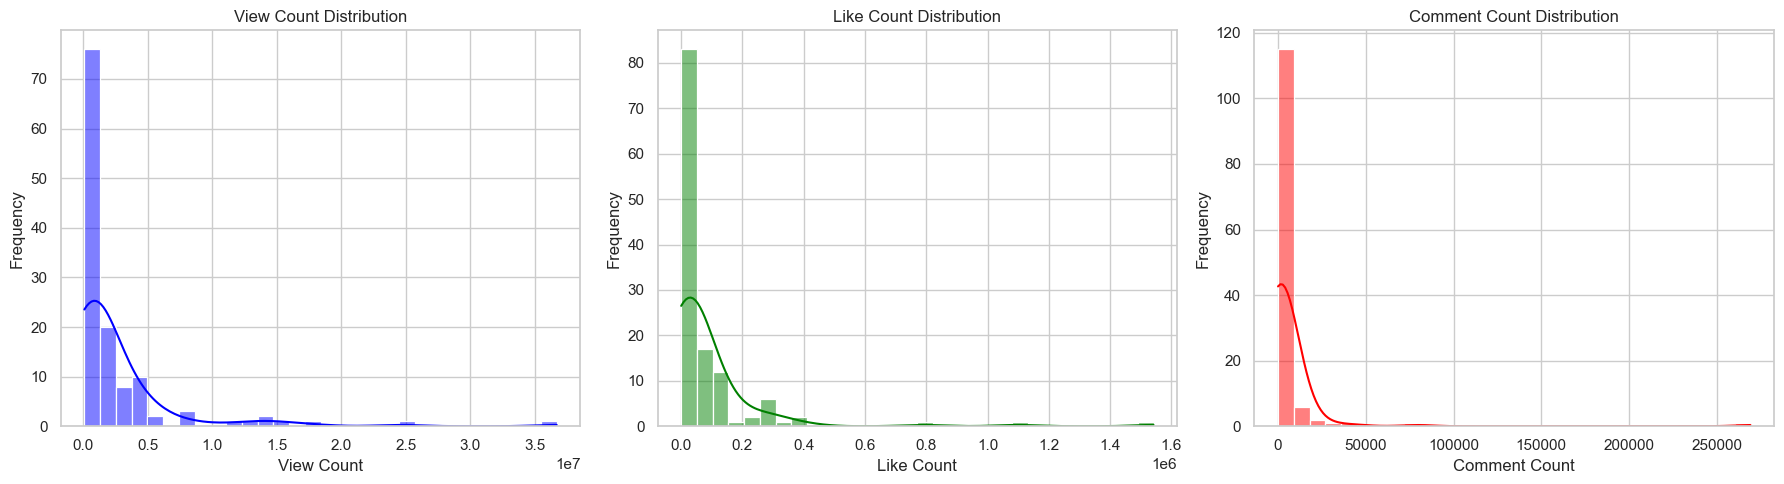

In [34]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# view count distribution
sns.histplot(trending_videos['view_count'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('View Count Distribution')
axes[0].set_xlabel('View Count')
axes[0].set_ylabel('Frequency')

# like count distribution
sns.histplot(trending_videos['like_count'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Like Count Distribution')
axes[1].set_xlabel('Like Count')
axes[1].set_ylabel('Frequency')

# comment count distribution
sns.histplot(trending_videos['comment_count'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Comment Count Distribution')
axes[2].set_xlabel('Comment Count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

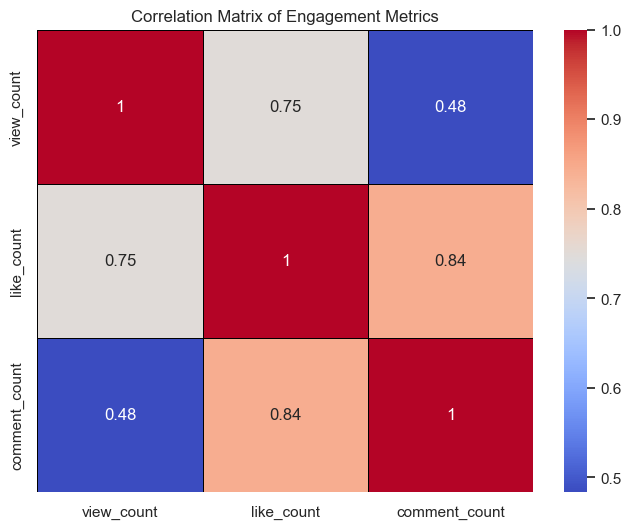

In [35]:
# Now, let’s have a look at the correlation between likes, views, and comments:
# correlation matrix
correlation_matrix = trending_videos[['view_count', 'like_count', 'comment_count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

In [36]:
# So, let’s collect the category names as well to analyze the categories of the trending videos:

from googleapiclient.discovery import build

API_KEY = API_KEY
youtube = build('youtube', 'v3', developerKey=API_KEY)

def get_category_mapping():
    request = youtube.videoCategories().list(
        part='snippet',
        regionCode='IN'
    )
    response = request.execute()
    category_mapping = {}
    for item in response['items']:
        category_id = int(item['id'])
        category_name = item['snippet']['title']
        category_mapping[category_id] = category_name
    return category_mapping

# get the category mapping
category_mapping = get_category_mapping()
print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


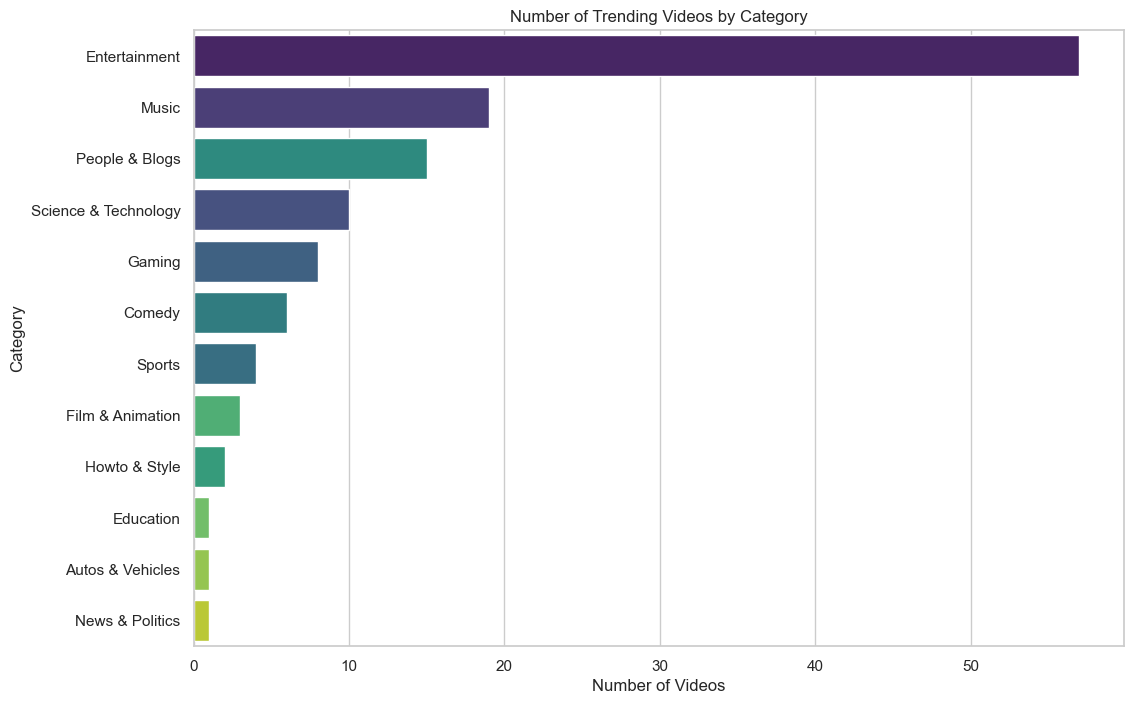

In [37]:
# Now, here’s how we can analyze the number of trending videos by category:

trending_videos['category_name'] = trending_videos['category_id'].map(category_mapping)

# Bar chart for category counts
plt.figure(figsize=(12, 8))
sns.countplot(y=trending_videos['category_name'], order=trending_videos['category_name'].value_counts().index, palette='viridis', hue = trending_videos['category_name'], legend = False)
plt.title('Number of Trending Videos by Category')
plt.xlabel('Number of Videos')
plt.ylabel('Category')
plt.show()

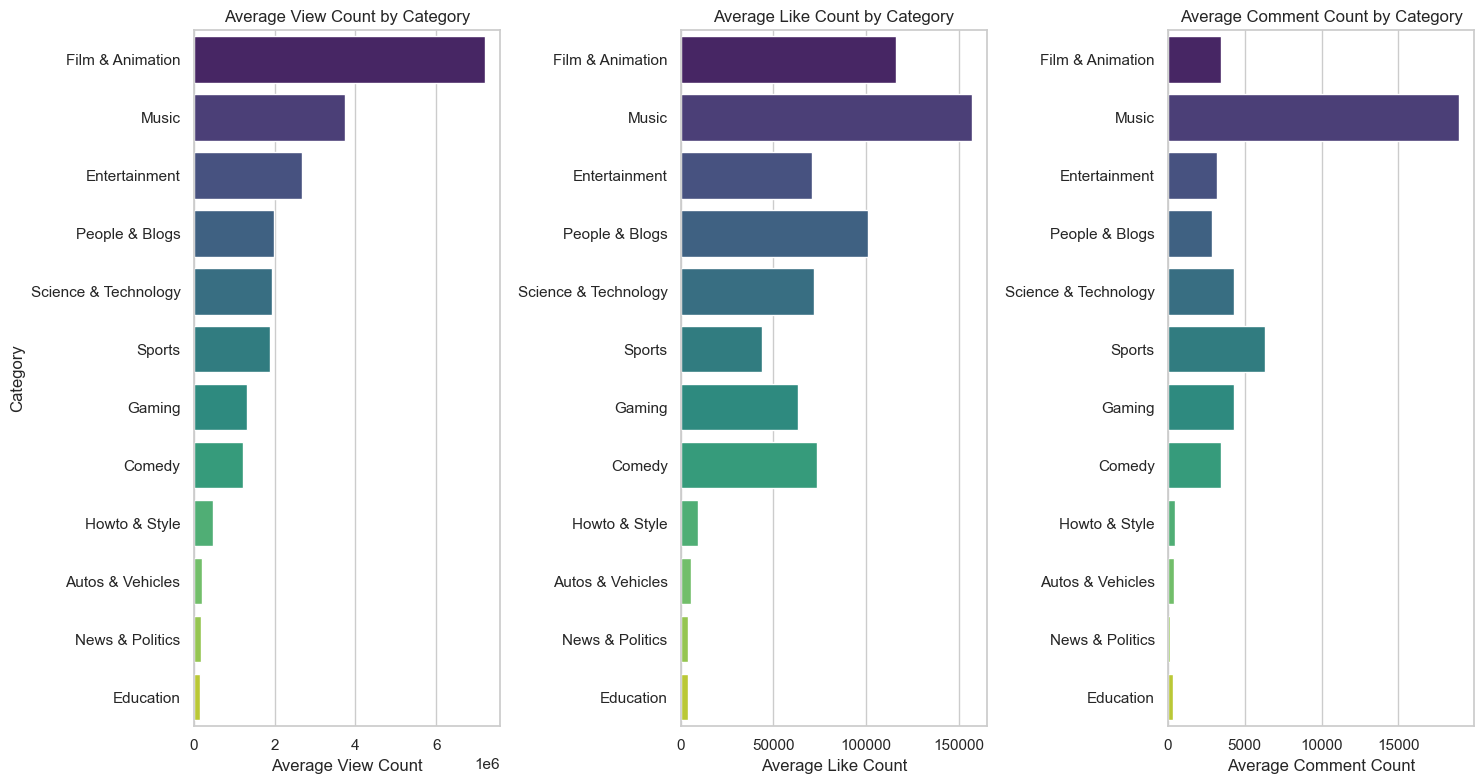

In [38]:
# Now, let’s have a look at the average engagement metrics by category:

# average engagement metrics by category
category_engagement = trending_videos.groupby('category_name')[['view_count', 'like_count', 'comment_count']].mean().sort_values(by='view_count', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(15, 8))

# view count by category
sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis', hue=category_engagement.index, legend = False)
axes[0].set_title('Average View Count by Category')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Category')

# like count by category
sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='viridis', hue=category_engagement.index, legend = False)
axes[1].set_title('Average Like Count by Category')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by category
sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette='viridis', hue=category_engagement.index, legend = False)
axes[2].set_title('Average Comment Count by Category')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

In [43]:
!pip install isodate

In [44]:
# Now, let’s analyze the content and duration of the videos. 
# But first, we need to convert the duration from ISO 8601 format to seconds:

import isodate

# convert ISO 8601 duration to seconds
trending_videos['duration_seconds'] = trending_videos['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())

trending_videos['duration_range'] = pd.cut(trending_videos['duration_seconds'], bins=[0, 300, 600, 1200, 3600, 7200], 
                                           labels=['0-5 min', '5-10 min', '10-20 min', '20-60 min', '60-120 min'])

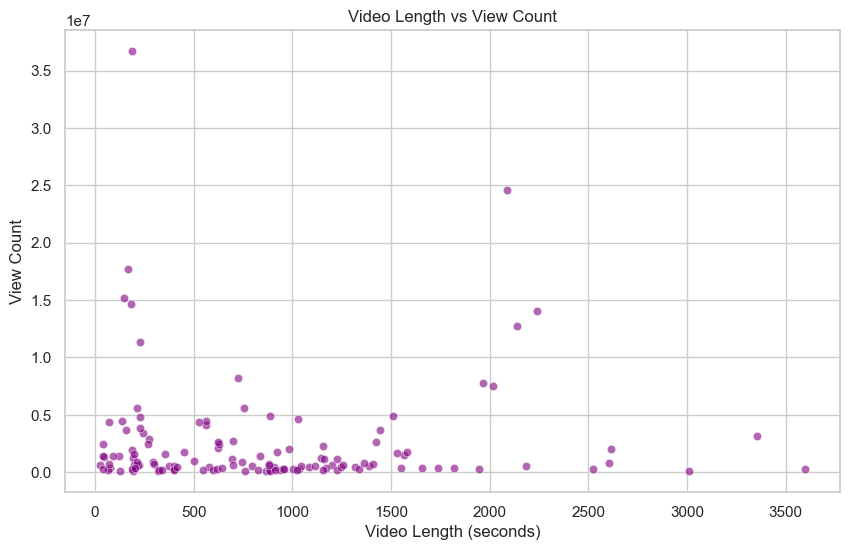

C:\Users\ambik\AppData\Local\Temp\ipykernel_13596\354053122.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_engagement = trending_videos.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()


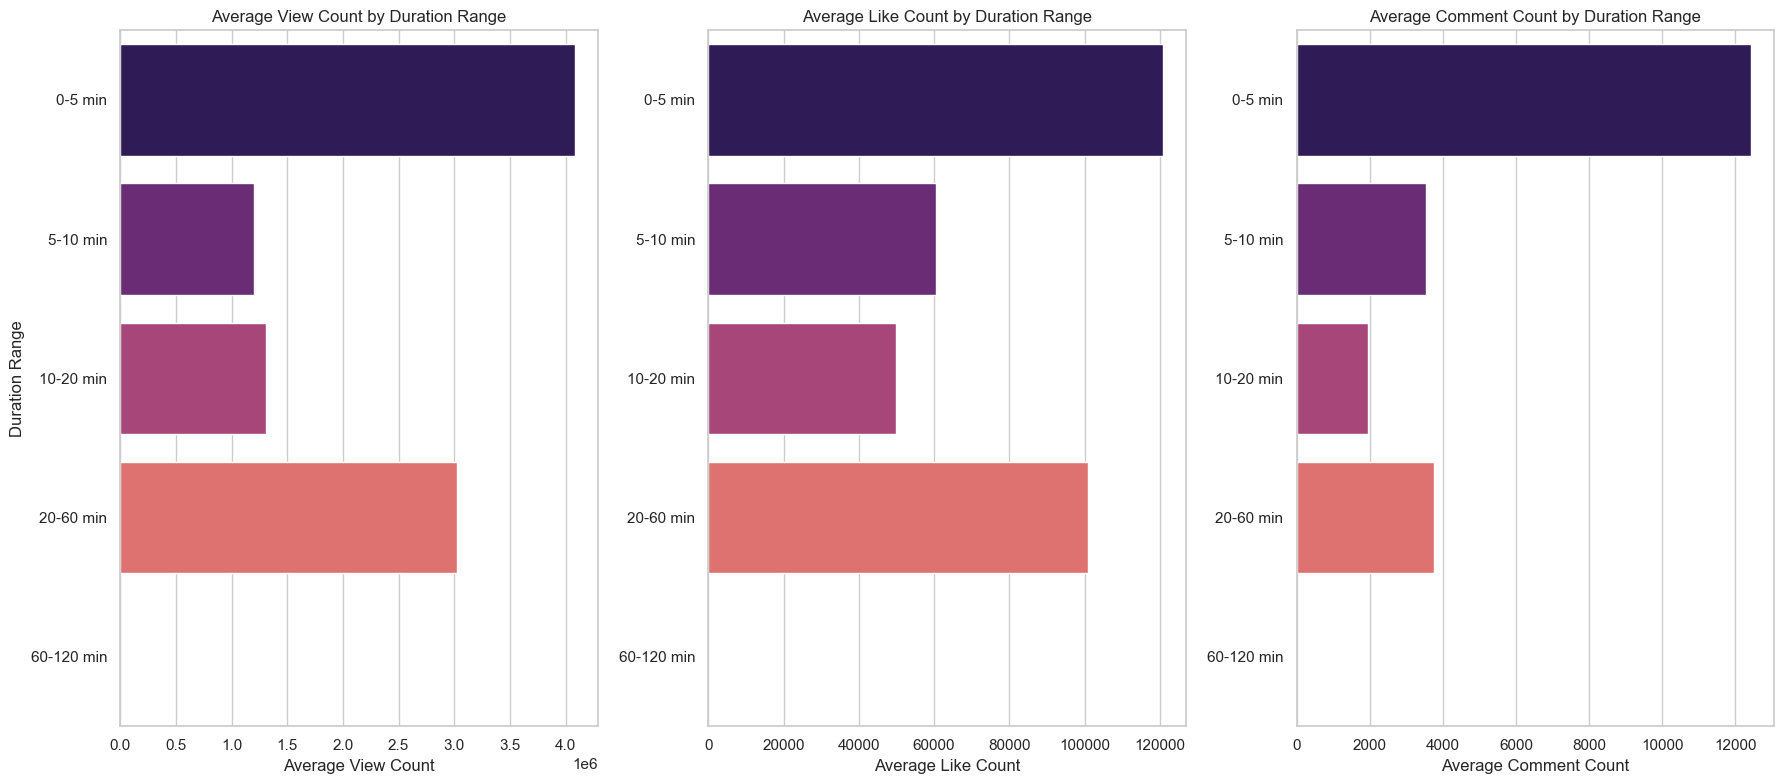

In [45]:
# Now, let’s analyze the content and the duration of videos:

# scatter plot for video length vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_seconds', y='view_count', data=trending_videos, alpha=0.6, color='purple')
plt.title('Video Length vs View Count')
plt.xlabel('Video Length (seconds)')
plt.ylabel('View Count')
plt.show()

# bar chart for engagement metrics by duration range
length_engagement = trending_videos.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# view count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['view_count'], ax=axes[0], palette='magma',hue =length_engagement.index, legend = False )
axes[0].set_title('Average View Count by Duration Range')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Duration Range')

# like count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['like_count'], ax=axes[1], palette='magma',hue =length_engagement.index, legend = False)
axes[1].set_title('Average Like Count by Duration Range')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['comment_count'], ax=axes[2], palette='magma',hue =length_engagement.index, legend = False)
axes[2].set_title('Average Comment Count by Duration Range')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

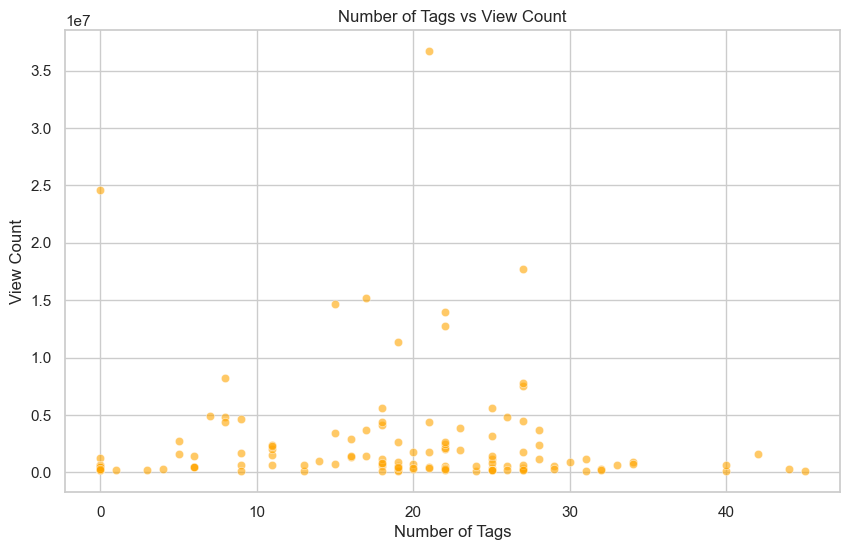

In [46]:
# Now, let’s analyze the relationship between views and number of tags used in the video:

# calculate the number of tags for each video
trending_videos['tag_count'] = trending_videos['tags'].apply(len)

# scatter plot for number of tags vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tag_count', y='view_count', data=trending_videos, alpha=0.6, color='orange')
plt.title('Number of Tags vs View Count')
plt.xlabel('Number of Tags')
plt.ylabel('View Count')
plt.show()

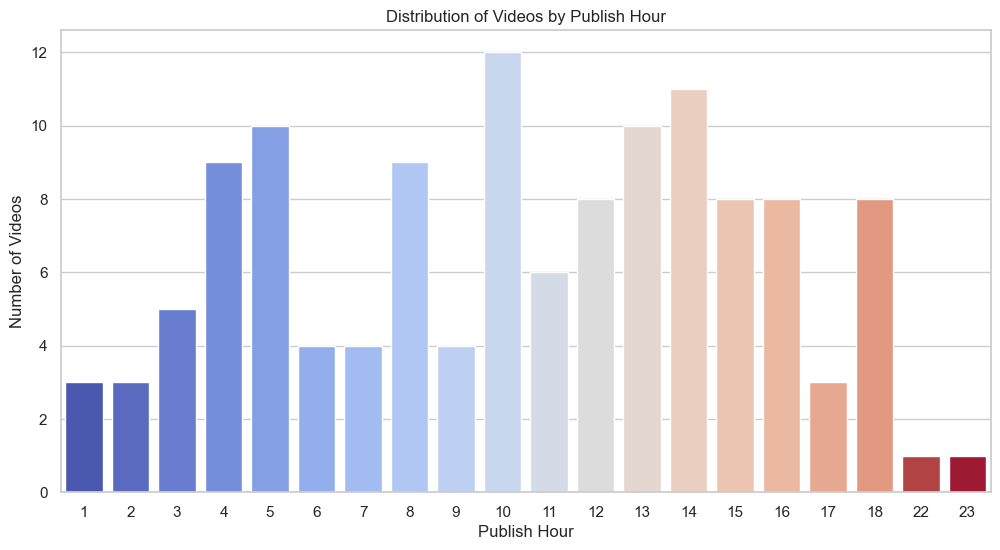

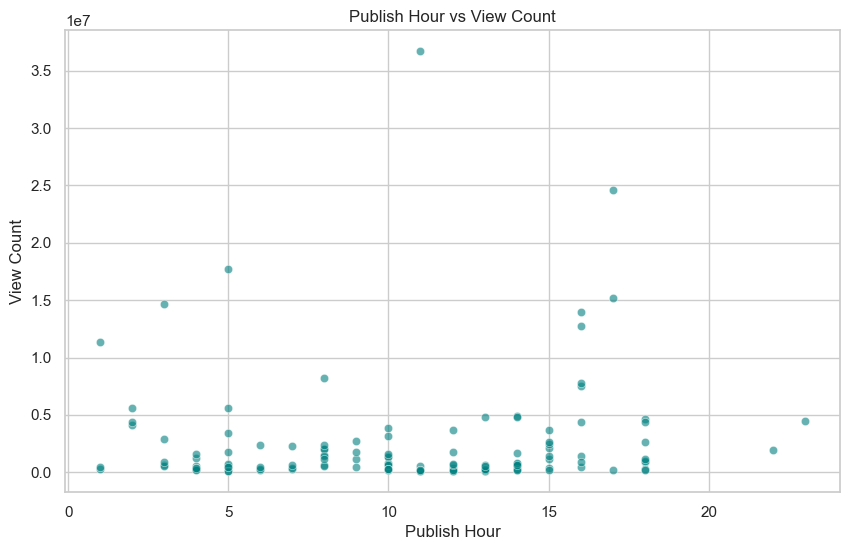

In [47]:
# Now, let’s see if there’s an impact of the time a video is posted on its views:

# extract hour of publication
trending_videos['publish_hour'] = trending_videos['published_at'].dt.hour

# bar chart for publish hour distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='publish_hour', data=trending_videos, palette='coolwarm',hue =trending_videos['publish_hour'], legend = False)
plt.title('Distribution of Videos by Publish Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Number of Videos')
plt.show()

# scatter plot for publish hour vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='publish_hour', y='view_count', data=trending_videos, alpha=0.6, color='teal')
plt.title('Publish Hour vs View Count')
plt.xlabel('Publish Hour')
plt.ylabel('View Count')
plt.show()